### WeatherPy Analysis
#### Observed Trends

#### 1) Cloudiness has the least correlation with Latitude compared with other variables.  The slope is basically flat.
#### 2) Max Temperature is the highest when Latitude is 0 (or near the equator).  Cities that are further out from the equator have lower max temperatures.
#### 3) The majority of cities in the sample tended to have high humidity percentages and low wind speeds.

In [18]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import random
import json
from citipy import citipy
plt.style.use("seaborn")
import time

# API Key
api_key = "43f0caa6aca8465b6f439da6bda4e8ca"

# Build query URL
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q=" # + city

In [35]:
# get random sample of latitude and longitude points and pass through citipy to get a list of cities
lat = []
lng = []
city_list = []

for latitude in np.random.uniform(-90,90,3000):
    lat.append(latitude)
for longitude in np.random.uniform(-180,180,3000):
    lng.append(longitude)
lat_lng = zip(lat,lng)
for lat, lng in lat_lng:
    city = citipy.nearest_city(lat, lng)
    city_list.append(city.city_name)

# From the list, get rid of duplicates and get a random sample of 600 cities 
city_list_no_dupes = random.sample(set(city_list),600)
clean_city_list = [city.replace(" ", "+") for city in city_list_no_dupes]

clean_city_df = pd.DataFrame(clean_city_list, columns = ["City"]).reset_index()

In [23]:
# Call OpenWeatherMap API and get data points for 500+ cities
for index,row in clean_city_df.iterrows():
    try:
        city = row["City"]
        response = req.get(query_url + city).json()
        city1 = response["name"]
        clean_city_df.set_value(index, "City Name", city1)
        cloudiness = response["clouds"]["all"]
        clean_city_df.set_value(index,"Cloudiness",cloudiness)
        country = response["sys"]["country"]
        clean_city_df.set_value(index, "Country", country)
        date = response["dt"]
        clean_city_df.set_value(index, "Date", date)
        humidity = response["main"]["humidity"]
        clean_city_df.set_value(index, "Humidity", humidity)
        lats = response["coord"]["lat"]
        clean_city_df.set_value(index, "Lat", lats)
        lons = response["coord"]["lon"]
        clean_city_df.set_value(index, "Lng", lons)
        max_temp = response["main"]["temp_max"]
        clean_city_df.set_value(index, "Max Temp", max_temp)
        wind_speed = response["wind"]["speed"]
        clean_city_df.set_value(index, "Wind Speed", wind_speed)
    except:
        print("Error with city data. Skipping")
        time.sleep(60)
        continue


Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error wi

In [36]:
# Clean up dataframe 
cleancity = clean_city_df.dropna(axis=0, how='any')
cleancity["Date"]= cleancity["Date"].astype(int)
cleancity = cleancity.drop('City', 1)


KeyError: 'Date'

In [27]:
# Counts of clean version if cities dataframe
cleancity.count()

index         538
City Name     538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [28]:
cleancity

,index,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Villa Carlos Paz,0.0,AR,1514059200,47.0,-31.42,-64.50,77.00,14.99
1,1,Marsa Matruh,40.0,EG,1514059200,67.0,31.35,27.25,60.80,11.41
2,2,Muravlenko,80.0,RU,1514061496,85.0,63.79,74.50,15.33,14.97
3,3,Ola,12.0,RU,1514055600,64.0,59.58,151.30,-41.81,11.27
4,4,Vredendal,0.0,ZA,1514061560,95.0,-31.68,18.49,55.16,2.77
5,5,Teguldet,68.0,RU,1514061561,87.0,57.31,88.17,8.72,2.59
6,6,Karratha,0.0,AU,1514061561,94.0,-20.74,116.85,74.51,5.57
7,7,Kapaa,90.0,US,1514059200,100.0,22.08,-159.32,73.40,10.29
8,8,Kamarion,76.0,GR,1514060400,100.0,36.80,25.82,50.00,26.40
9,9,Karpokhorion,20.0,GR,1514058600,64.0,39.33,22.02,37.40,11.41


### Latitude vs Temperature Plot

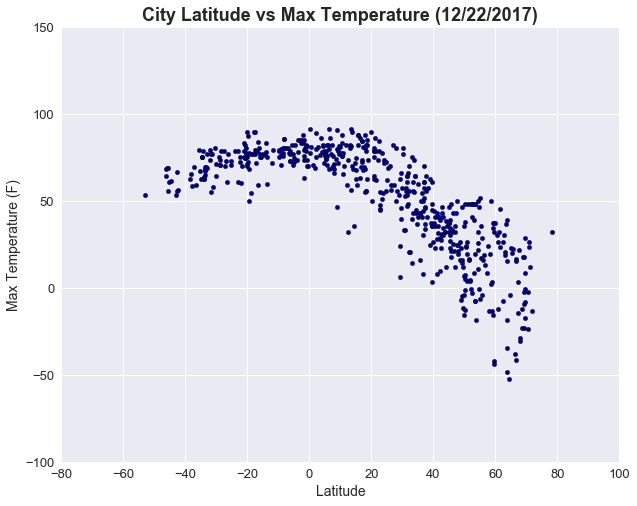

In [34]:
# Scatter Plot Number 1
cleancity.plot(kind="scatter", x="Lat", y="Max Temp", grid =True, edgecolor = "black",color = "darkblue", figsize =(10,8))
plt.title("City Latitude vs Max Temperature (12/22/2017)", fontsize = 18, fontweight='bold')
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Max Temperature (F)",fontsize = 14)
plt.xlim(-80,100)
plt.ylim(-100, 150)
plt.tick_params(labelsize=13)
plt.show()

### Latitude vs Humidity Plot

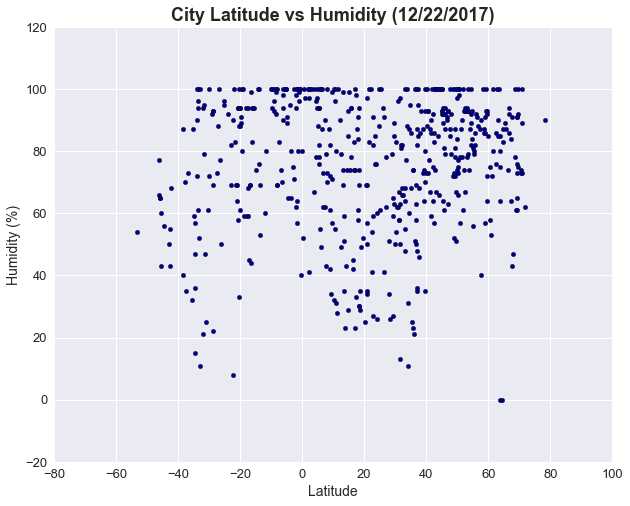

In [30]:
# Scatter Plot Number 2
cleancity.plot(kind="scatter", x="Lat", y="Humidity", grid =True, edgecolor = "black",color = "darkblue", figsize =(10,8))
plt.title("City Latitude vs Humidity (12/22/2017)", fontsize = 18, fontweight='bold')
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Humidity (%)",fontsize = 14)
plt.xlim(-80,100)
plt.ylim(-20, 120)
plt.tick_params(labelsize=13)
plt.show()

### Latitude vs Cloudiness Plot

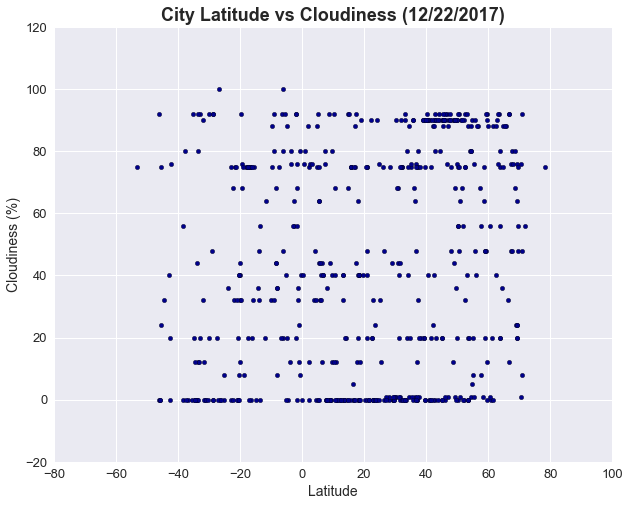

In [31]:
# Scatter Plot Number 3
cleancity.plot(kind="scatter", x="Lat", y="Cloudiness", grid =True, edgecolor = "black",color = "darkblue", figsize =(10,8))
plt.title("City Latitude vs Cloudiness (12/22/2017)", fontsize = 18, fontweight='bold')
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Cloudiness (%)",fontsize = 14)
plt.xlim(-80,100)
plt.ylim(-20, 120)
plt.tick_params(labelsize=13)
plt.show()

### Latitude vs Wind Speed Plot

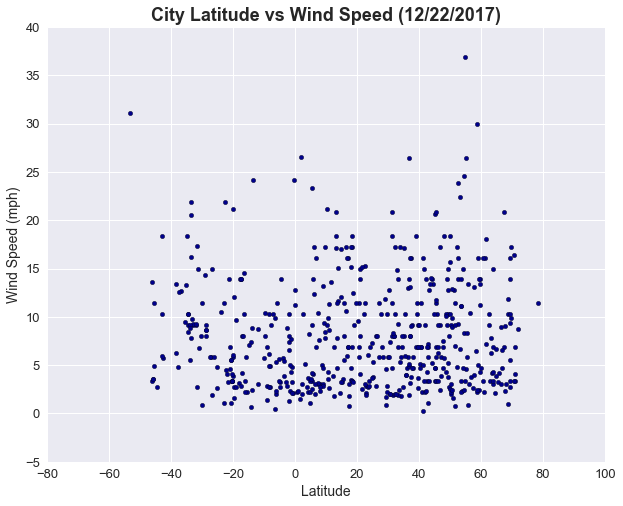

In [32]:
# Scatter Plot Number 4
cleancity.plot(kind="scatter", x="Lat", y="Wind Speed", grid =True, edgecolor = "black",color = "darkblue", figsize =(10,8))
plt.title("City Latitude vs Wind Speed (12/22/2017)", fontsize = 18, fontweight='bold')
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Wind Speed (mph)",fontsize = 14)
plt.xlim(-80,100)
plt.ylim(-5, 40)
plt.tick_params(labelsize=13)
plt.show()